In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#import tensorflow as tf

from sklearn.metrics import mean_squared_error, r2_score

from IPython.core.display import display, HTML

In [2]:
df=pd.read_csv(r'C:\Users\mls\Downloads\data_household_income.csv')

In [3]:
df.isna().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [4]:
cats = ["Education_Level", "Occupation", "Number_of_Dependents",
       "Location", "Marital_Status", "Employment_Status", "Household_Size",
       "Homeownership_Status", "Type_of_Housing", "Gender", "Primary_Mode_of_Transportation"]

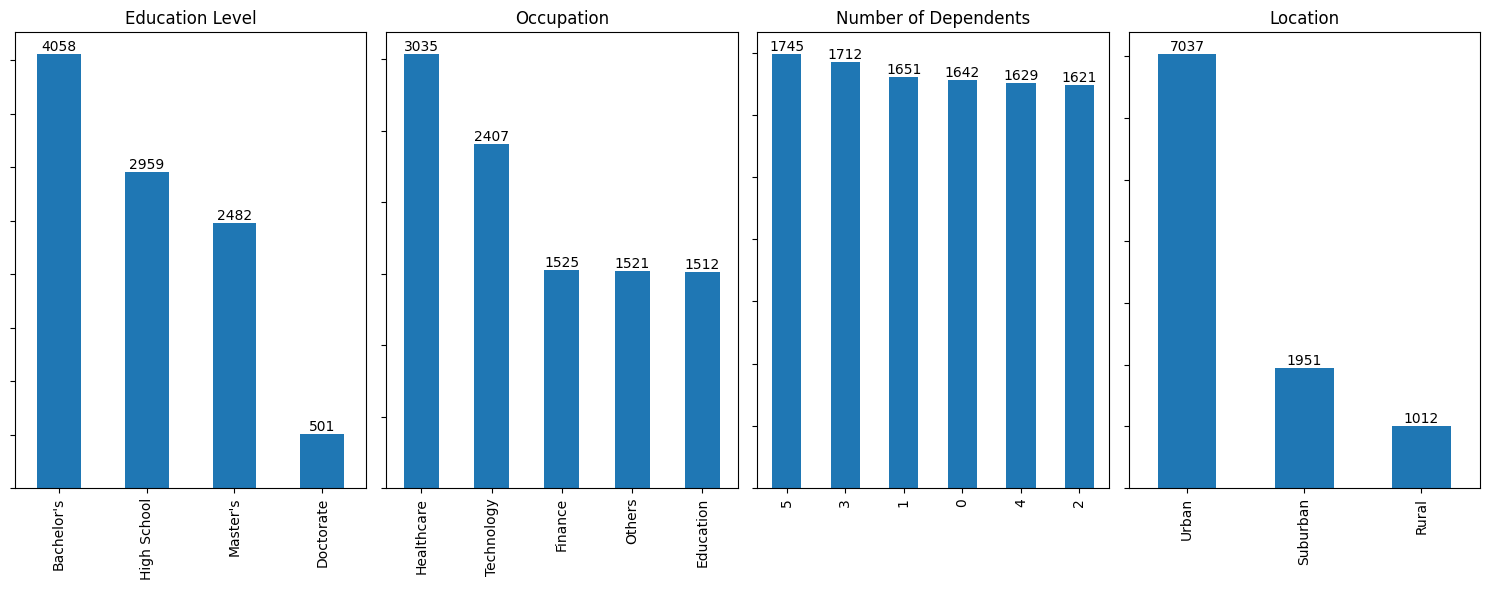

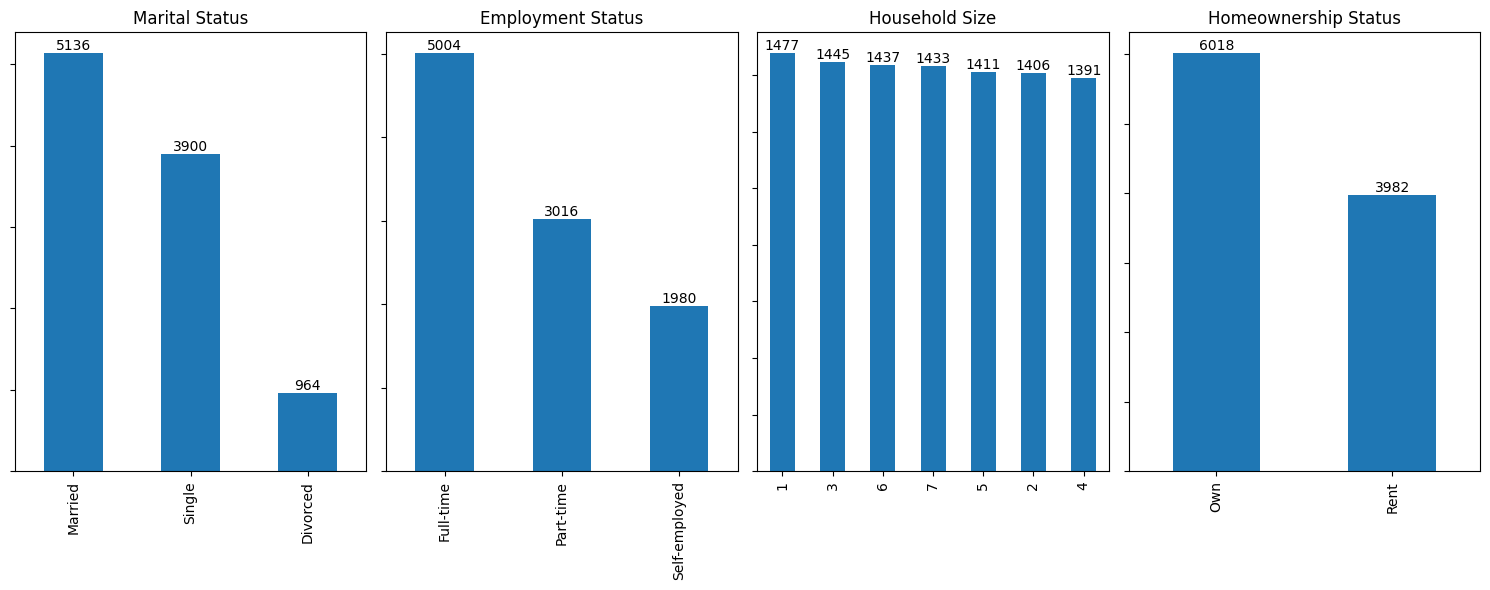

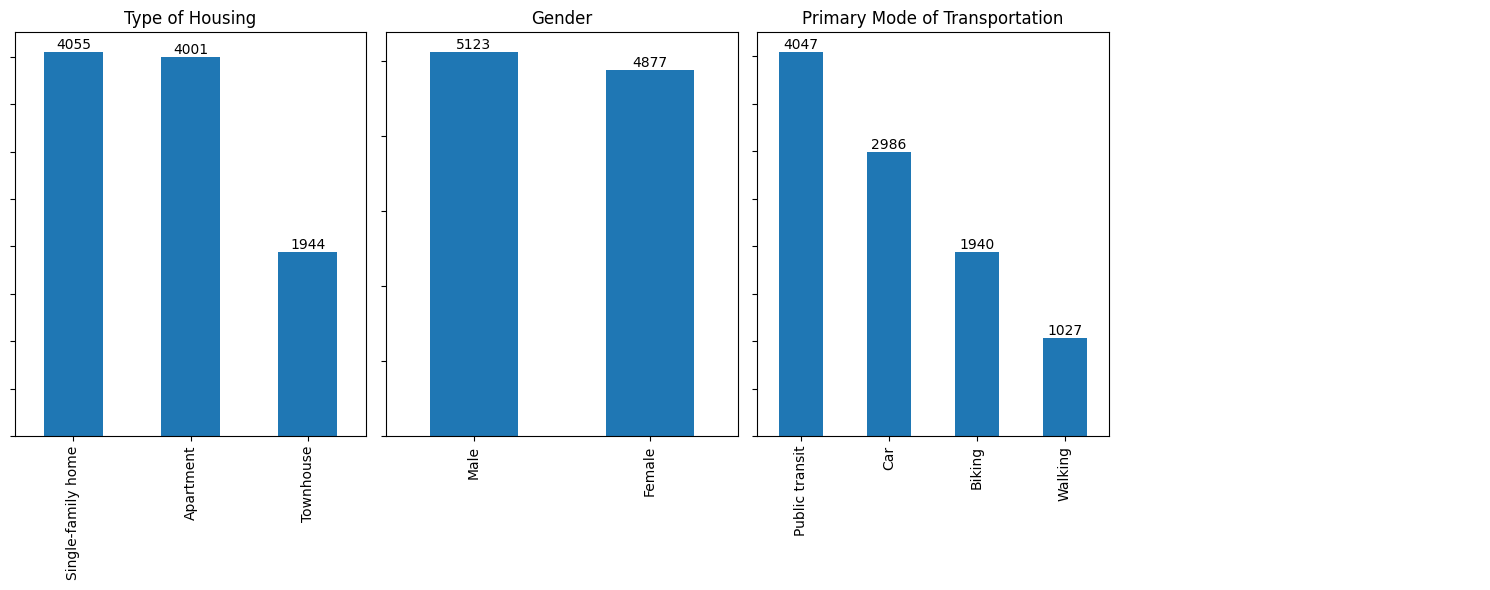

In [5]:
index = 0

for j in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

    for i in range(4):
        count = df[cats[index]].value_counts()
        count.plot(kind="bar", ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container)

        axes[i].set_yticklabels(())
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()
    
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
for i in range(3):
    count = df[cats[index]].value_counts()
    count.plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)

    axes[i].set_yticklabels(())
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(cats[index].replace('_', ' '))
    index += 1

axes[3].axis("off")
plt.tight_layout()
plt.show()

In [6]:
nums = [i for i in df.columns if i not in cats]

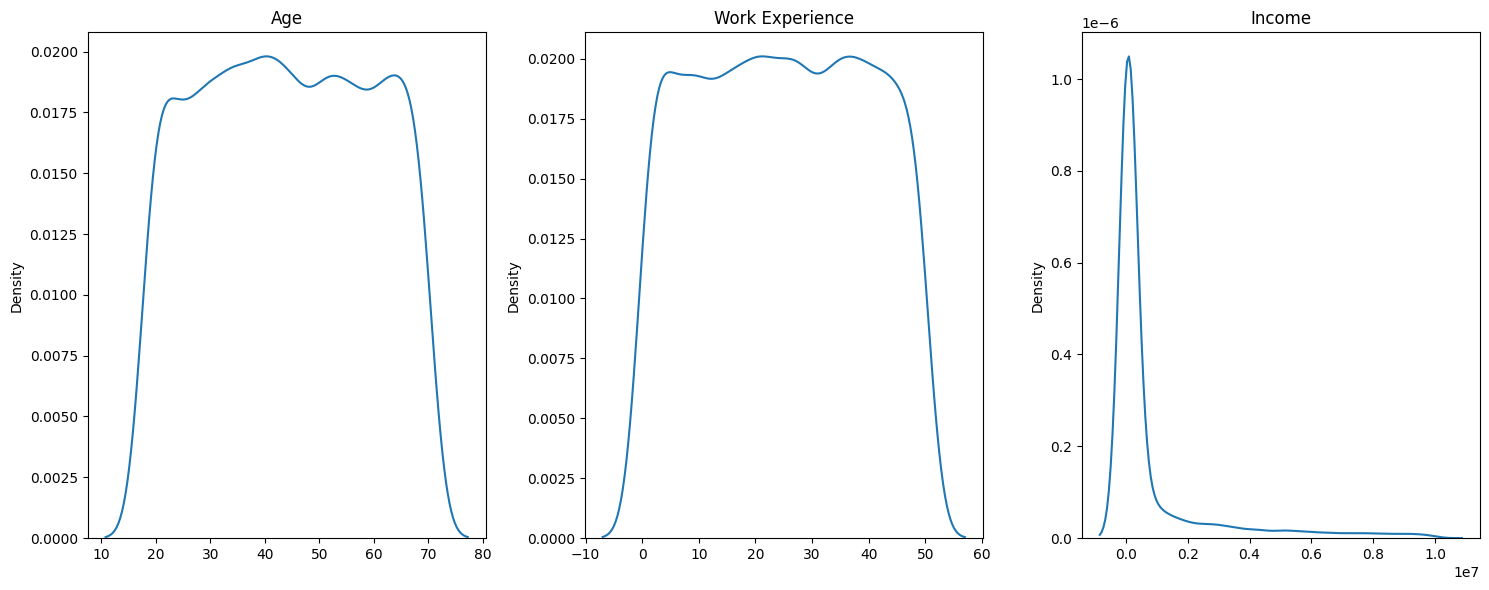

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.kdeplot(df, x=j, ax=axes[i])
    axes[i].set_title(j.replace('_', ' '))
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

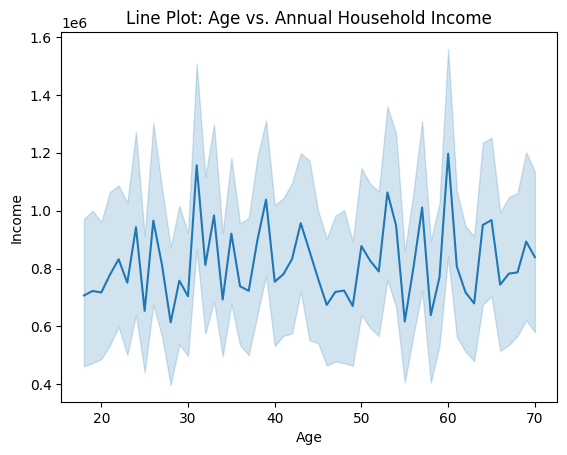

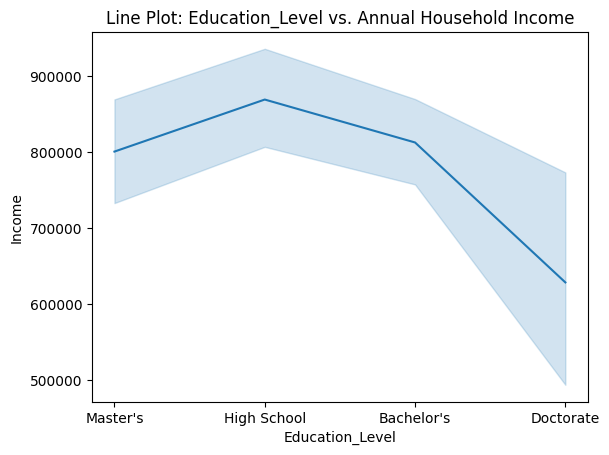

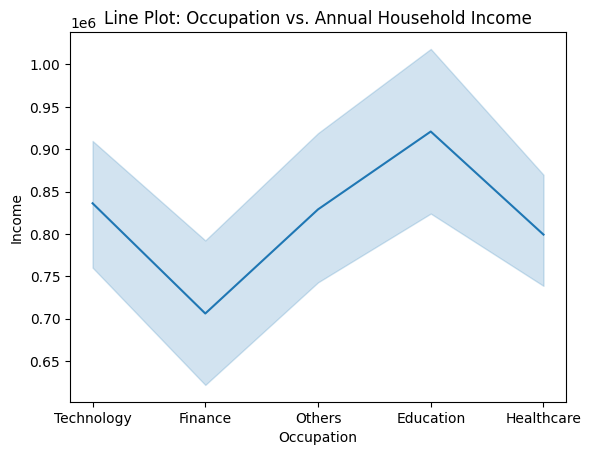

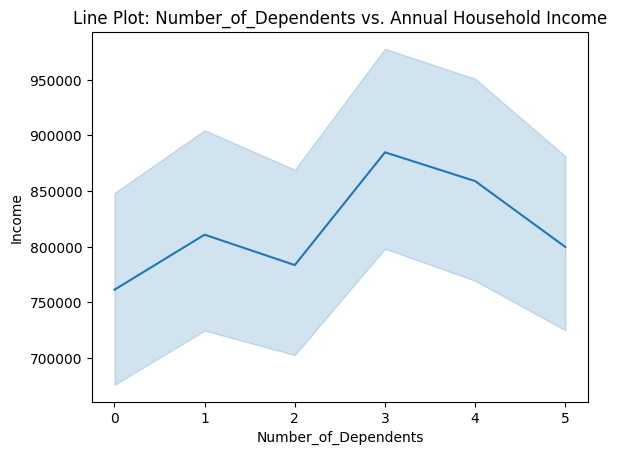

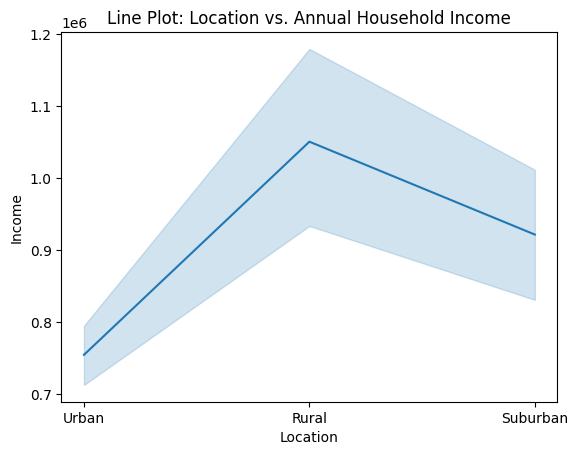

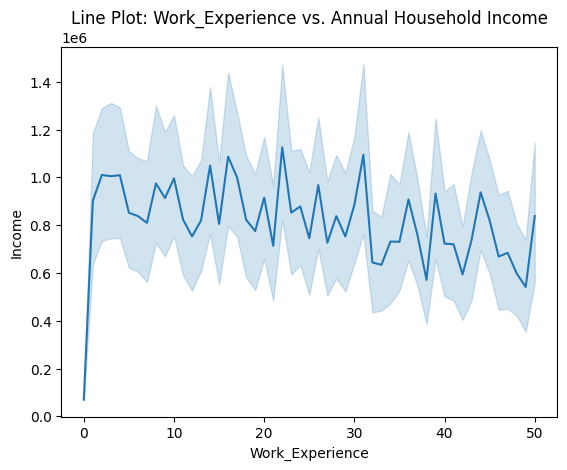

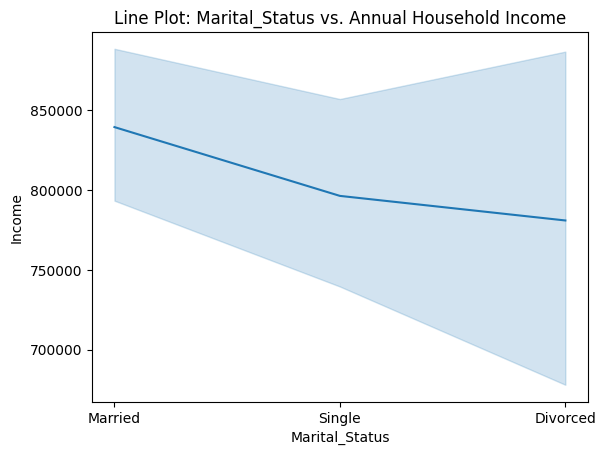

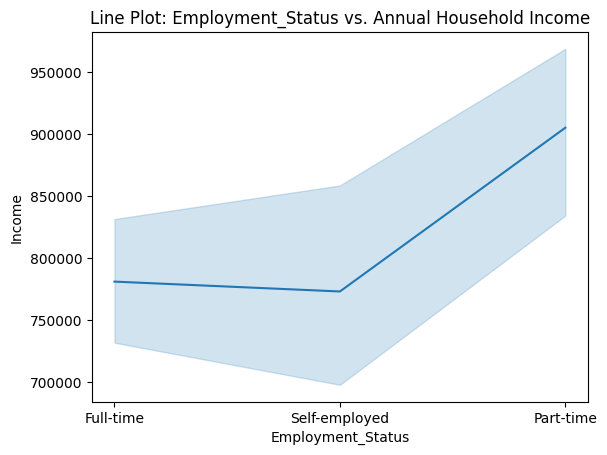

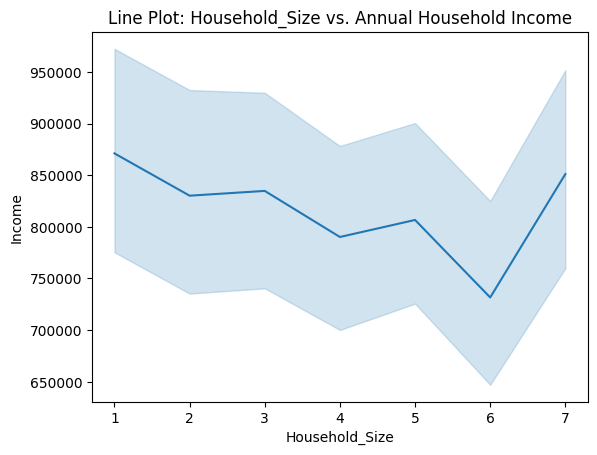

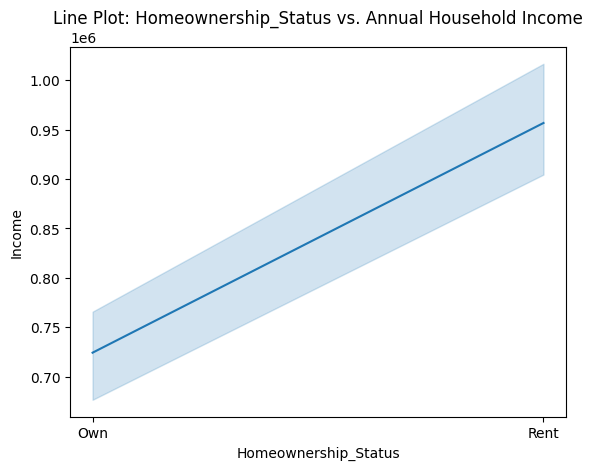

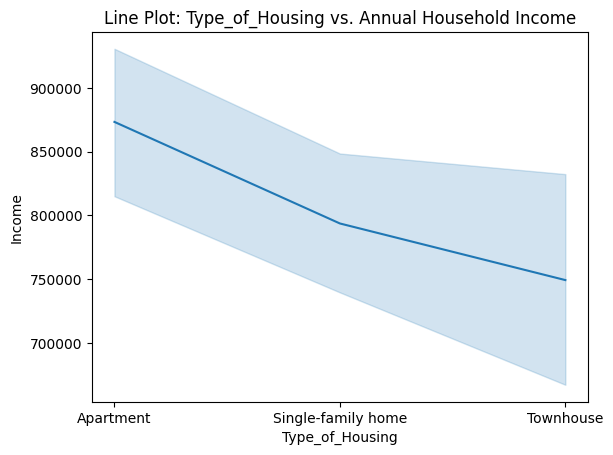

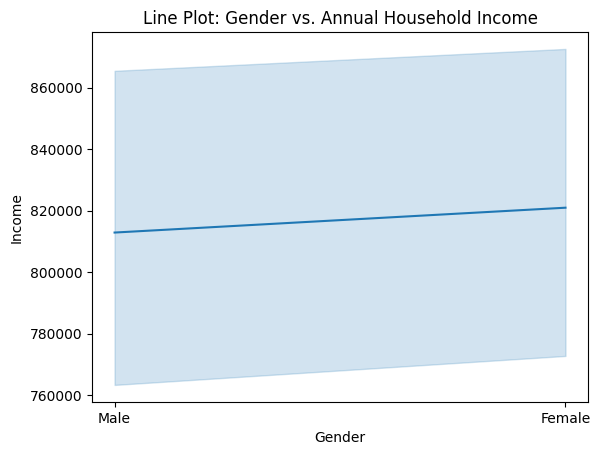

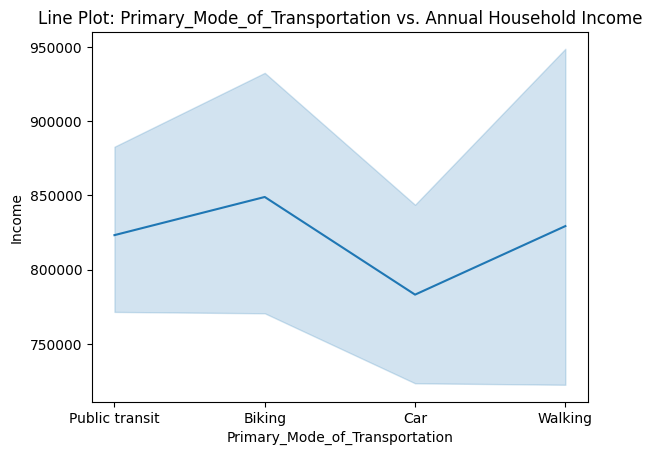

In [8]:
# Lineplot
for col in df:
    if col != "Income":
        sns.lineplot(x=col, y='Income', data=df)
        plt.title(f'Line Plot: {col} vs. Annual Household Income')
        plt.show()

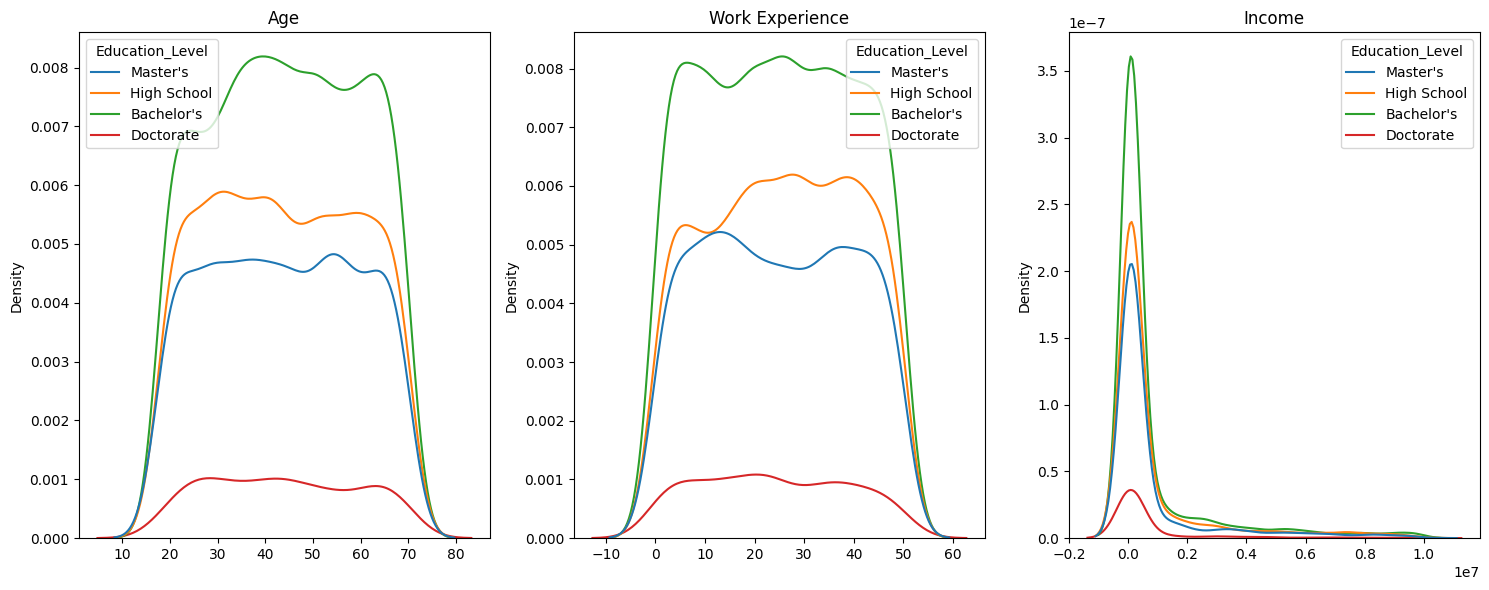

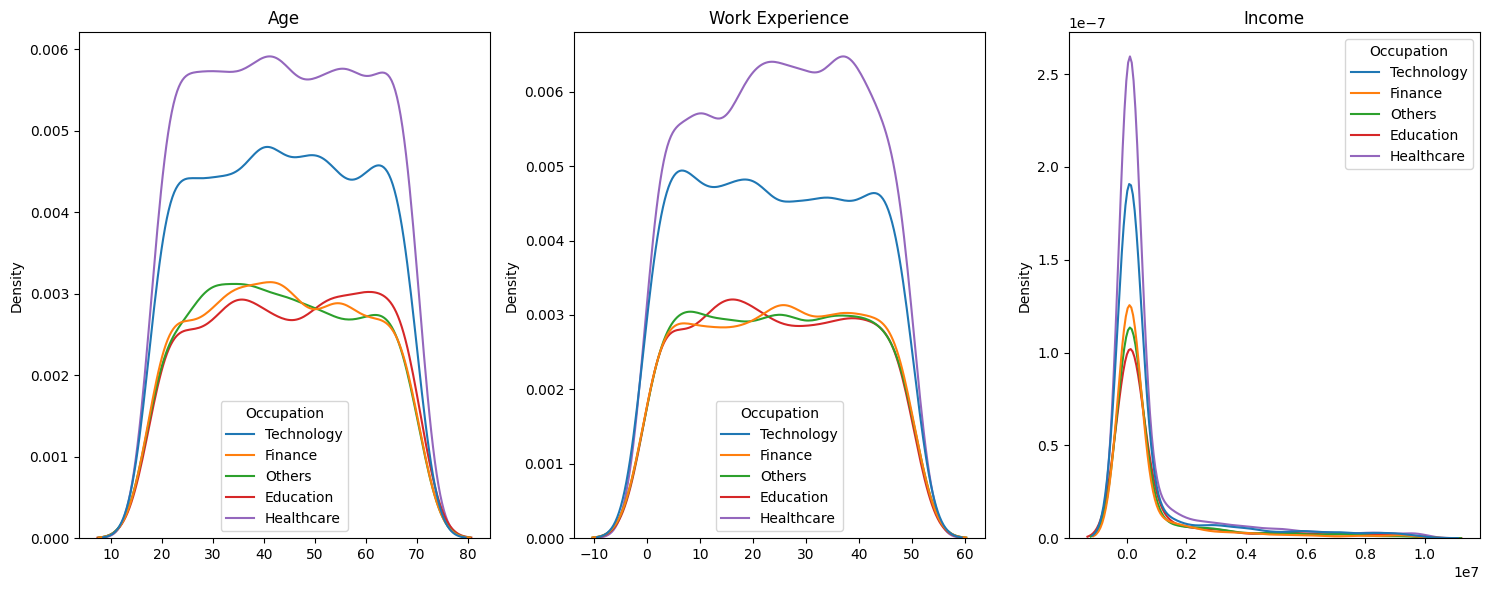

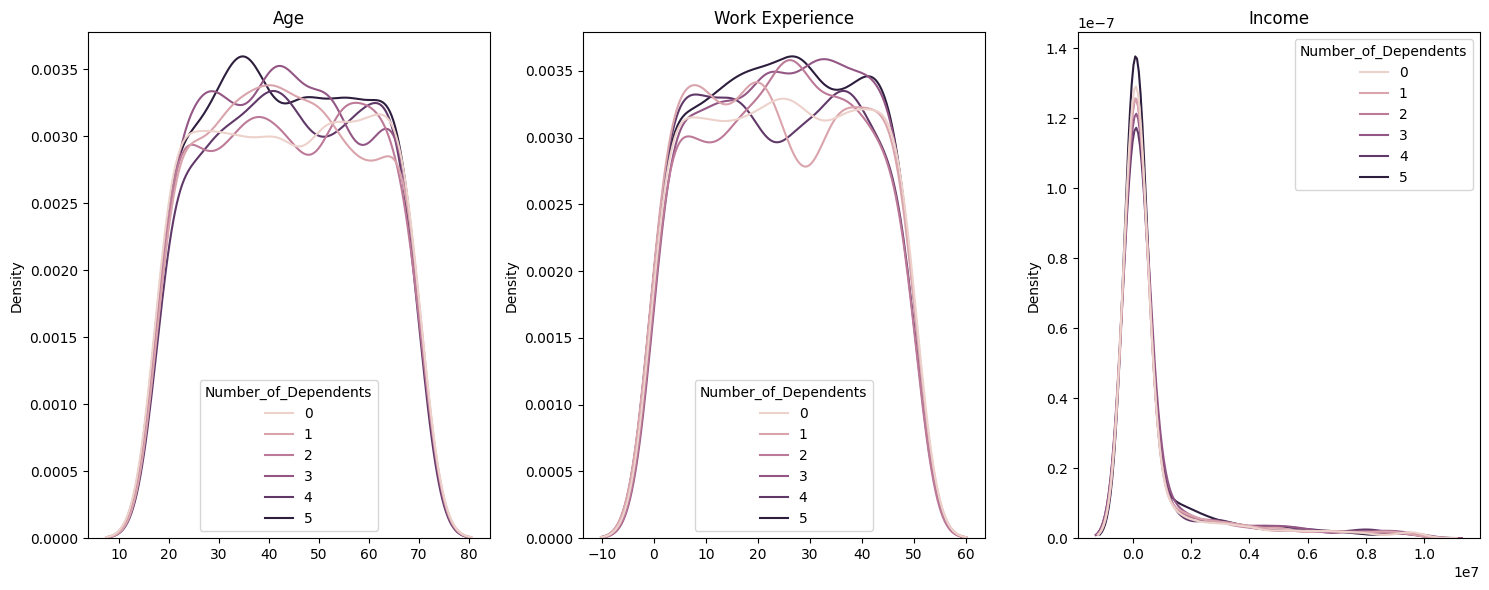

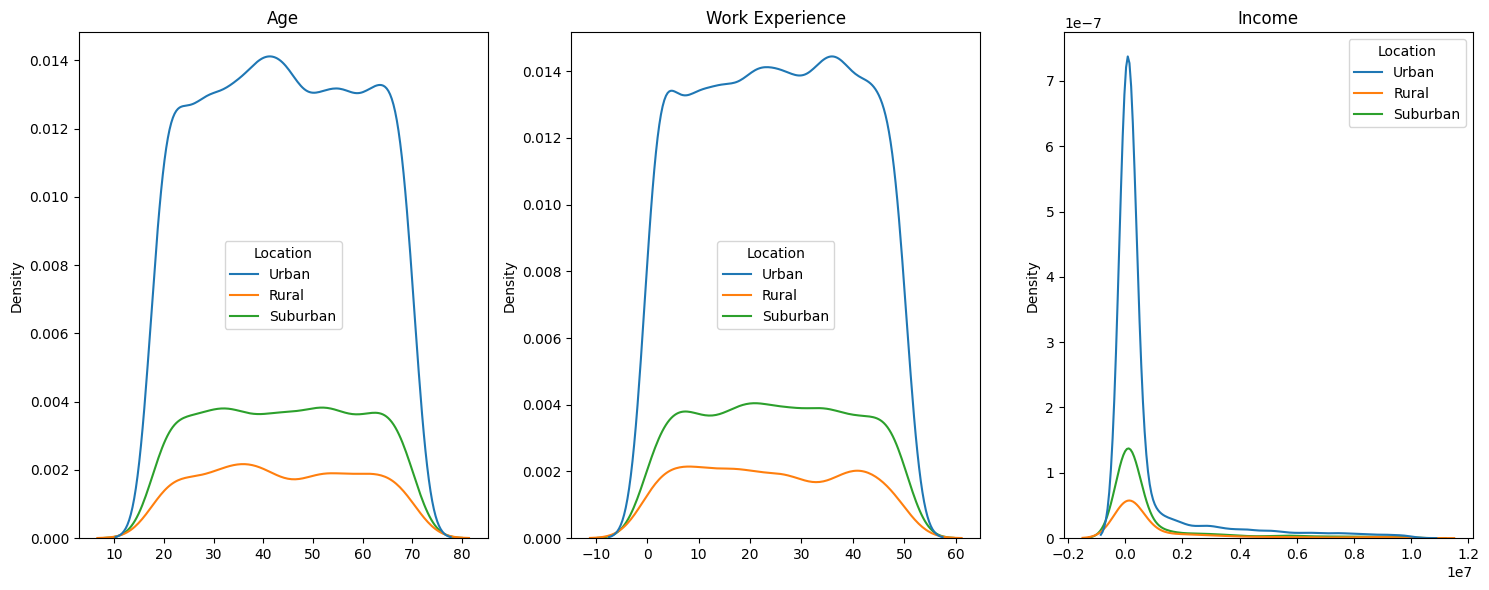

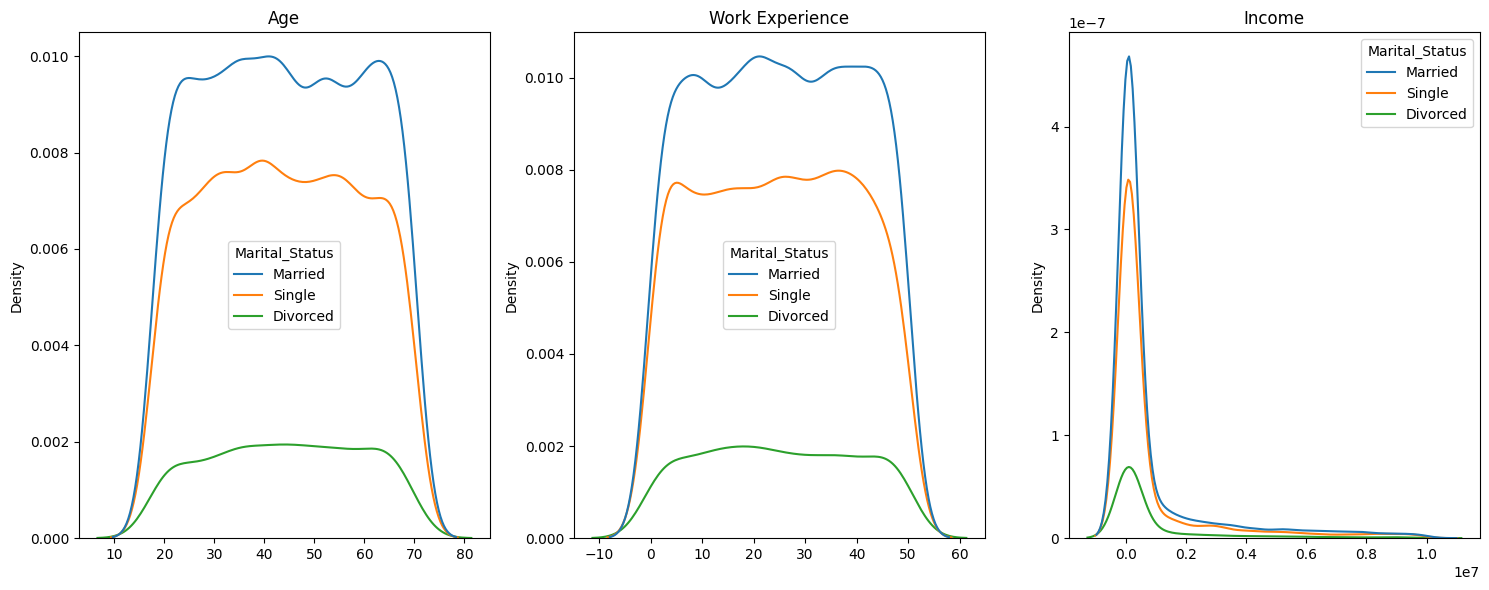

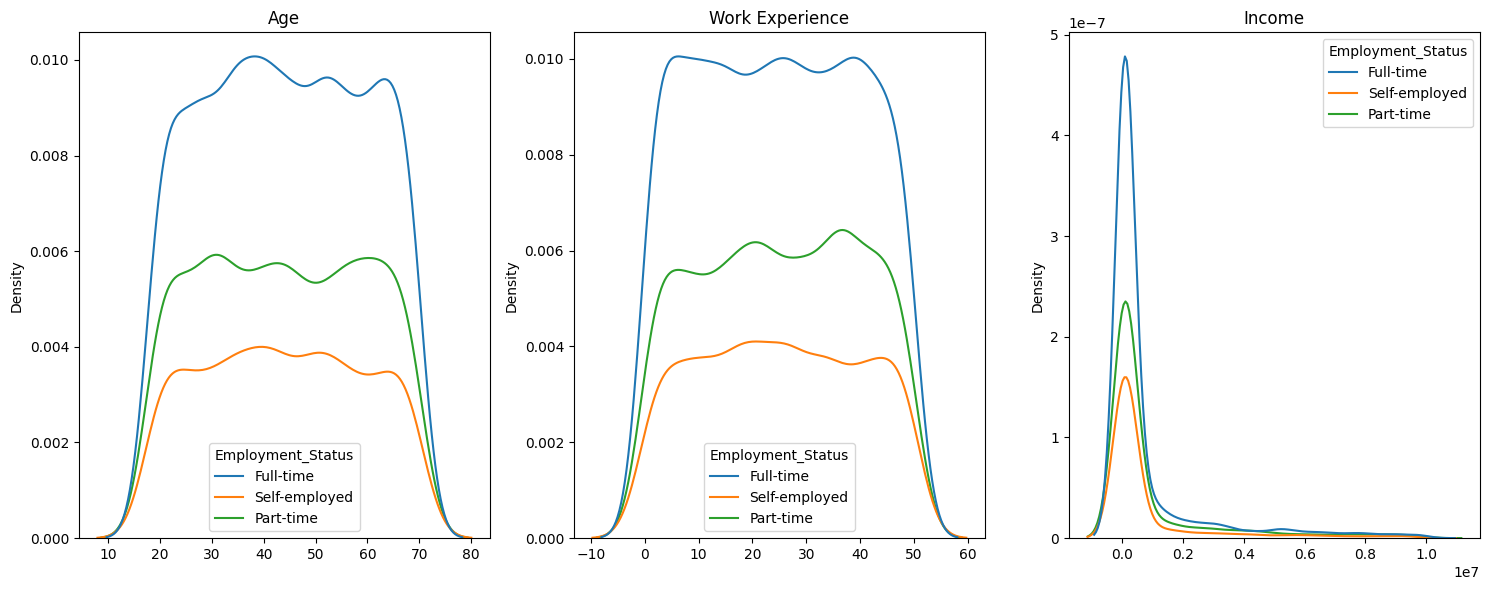

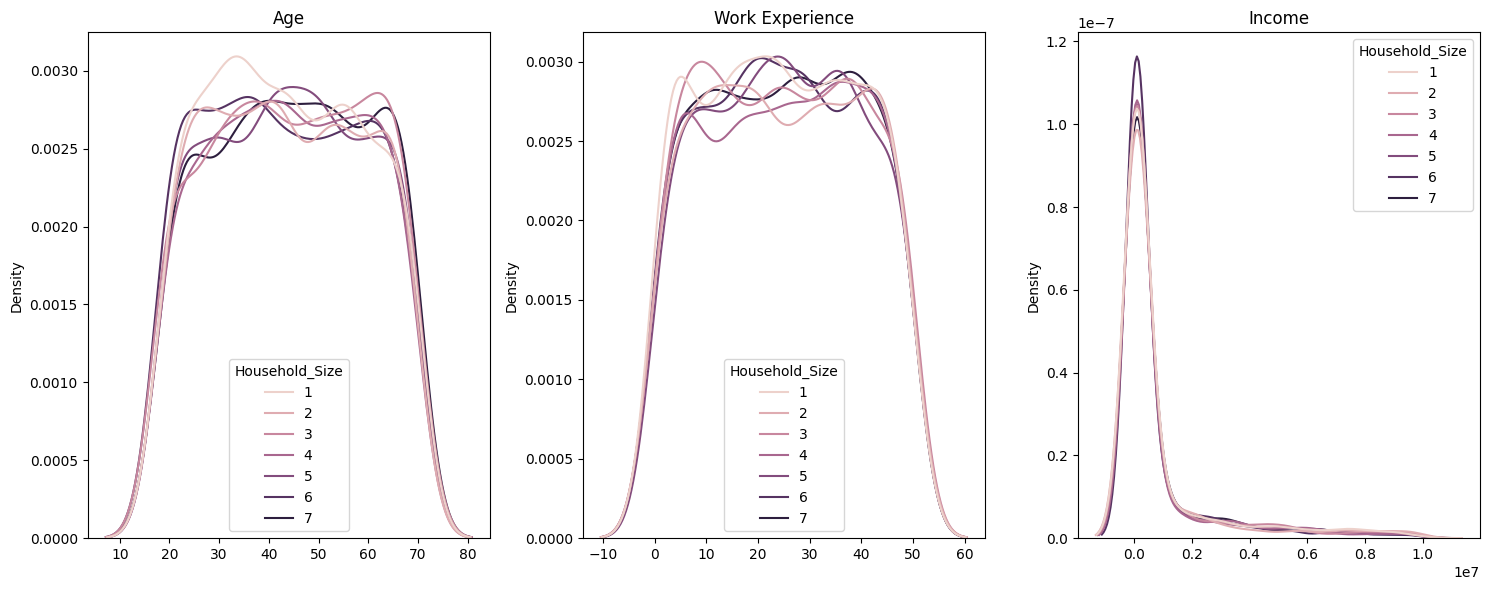

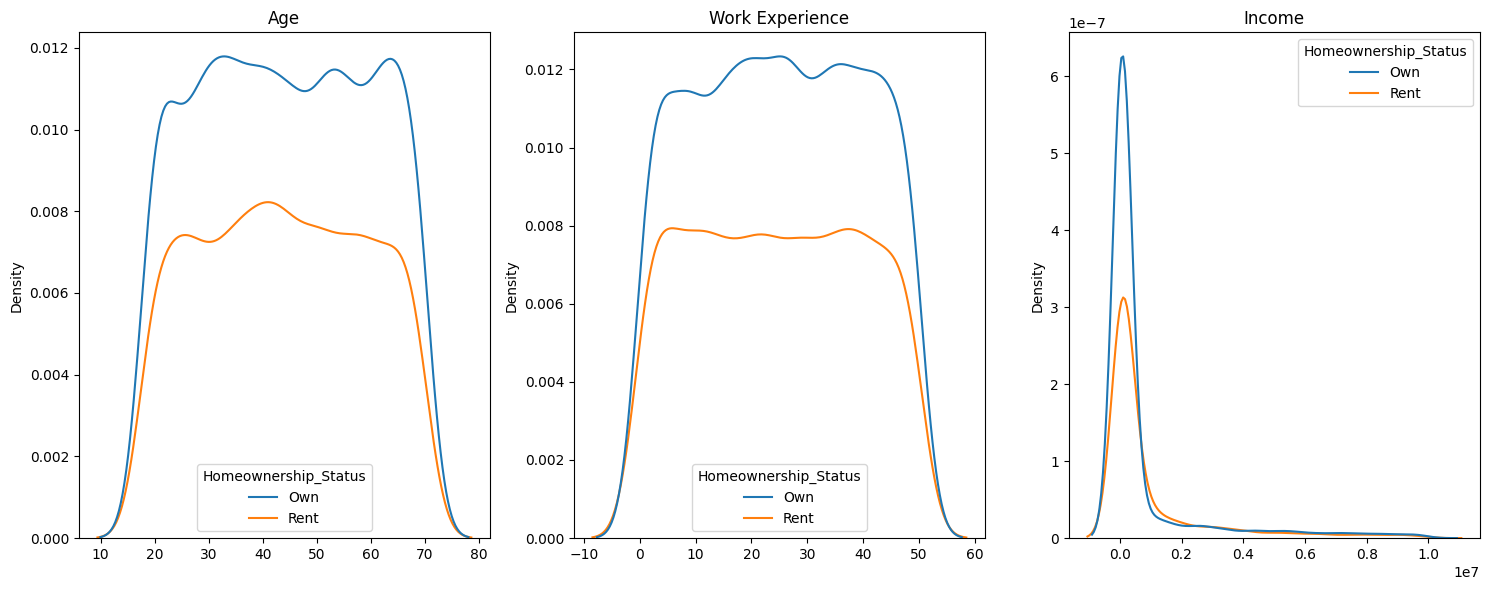

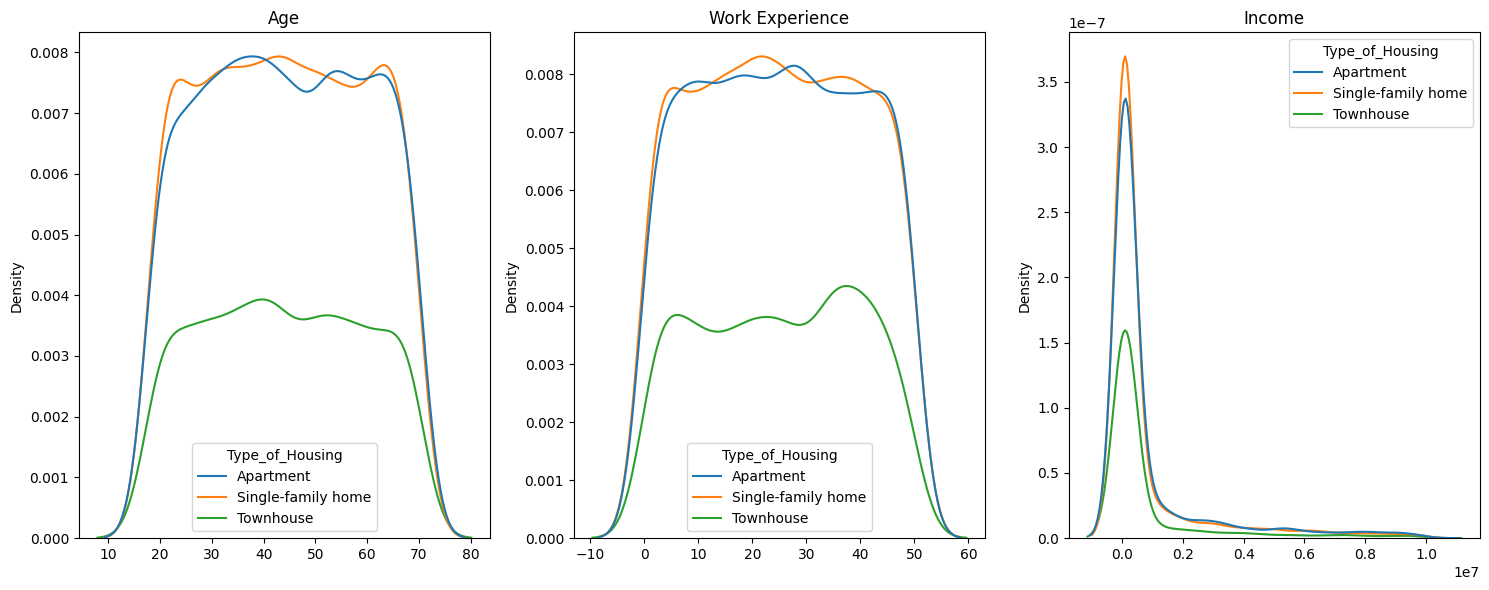

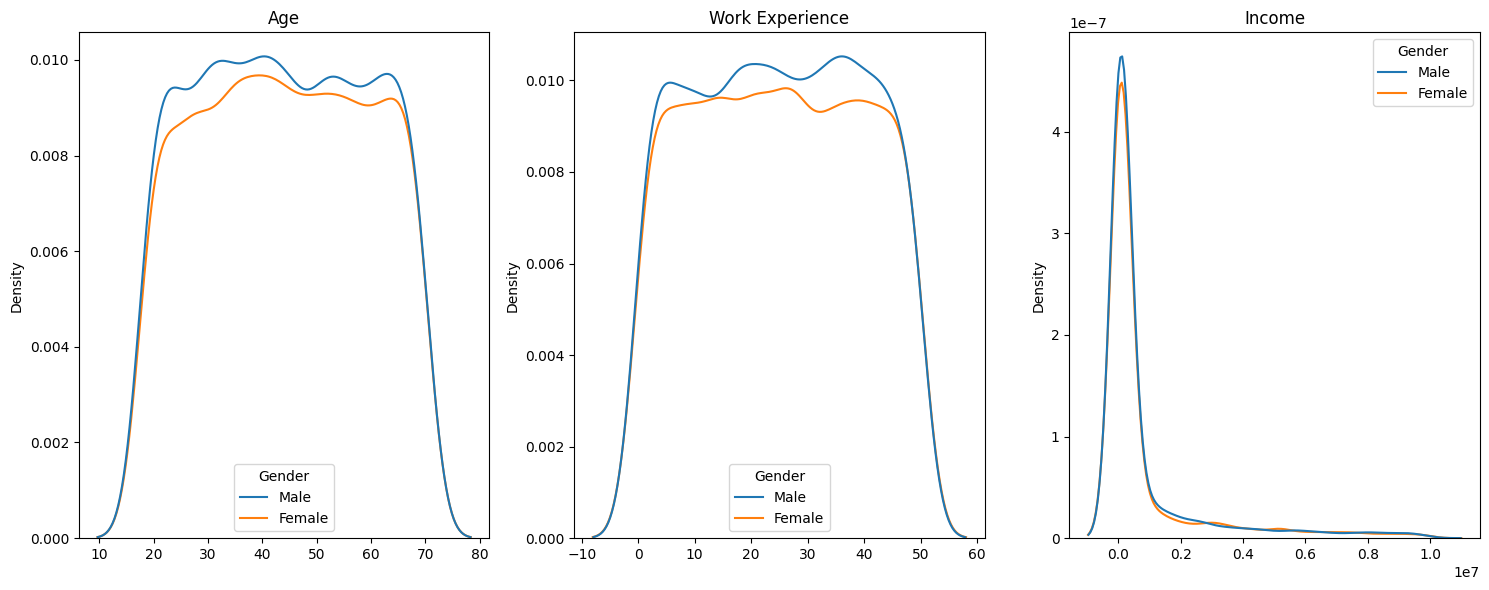

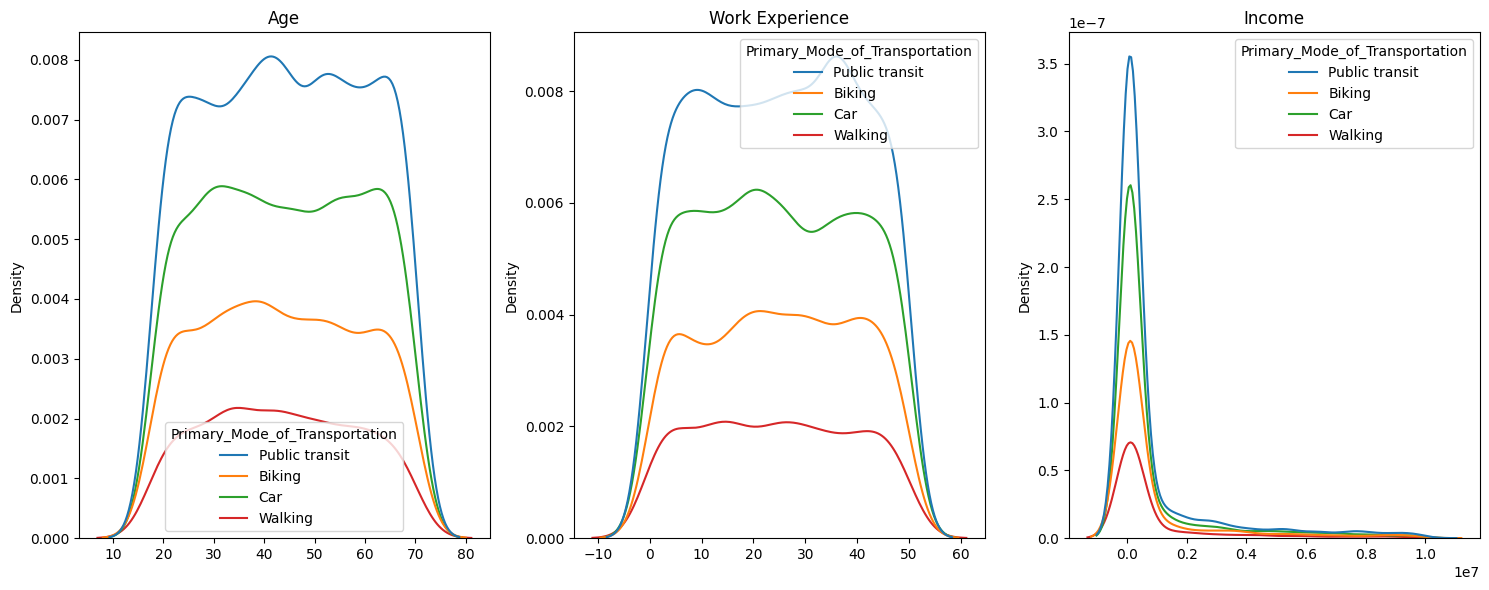

In [9]:
for i in cats:
    display(HTML("<h2>{}</h2>".format(i.replace('_', ' '))))
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))
    for j, k in enumerate(nums):
        sns.kdeplot(df, x=k, hue=i, ax=axes[j])
        axes[j].set_xlabel("")
        axes[j].set_title(k.replace('_', ' '))
    plt.tight_layout()
    plt.show()

In [13]:
le = LabelEncoder()

for i in cats:
    if i != "Number_of_Dependents" and i != "Household_Size":
        df[i] = le.fit_transform(df[i].values)

In [14]:
df.head(20)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,3,4,5,2,21,1,0,7,0,0,1,2,72510
1,69,2,1,0,2,4,2,0,7,0,0,1,0,75462
2,46,0,4,1,2,1,2,0,7,0,1,0,1,71748
3,32,2,3,2,2,32,1,0,1,0,0,0,1,74520
4,60,0,1,3,2,15,1,2,4,0,2,1,3,640210
5,25,2,3,1,0,6,2,1,1,1,2,0,1,73406
6,38,3,4,3,0,20,1,0,4,1,1,1,2,3584362
7,56,3,0,1,1,34,1,1,7,0,2,0,2,70066
8,36,3,1,4,1,45,1,0,2,0,0,0,2,69636
9,40,0,0,4,2,21,1,0,6,0,0,0,0,5188124


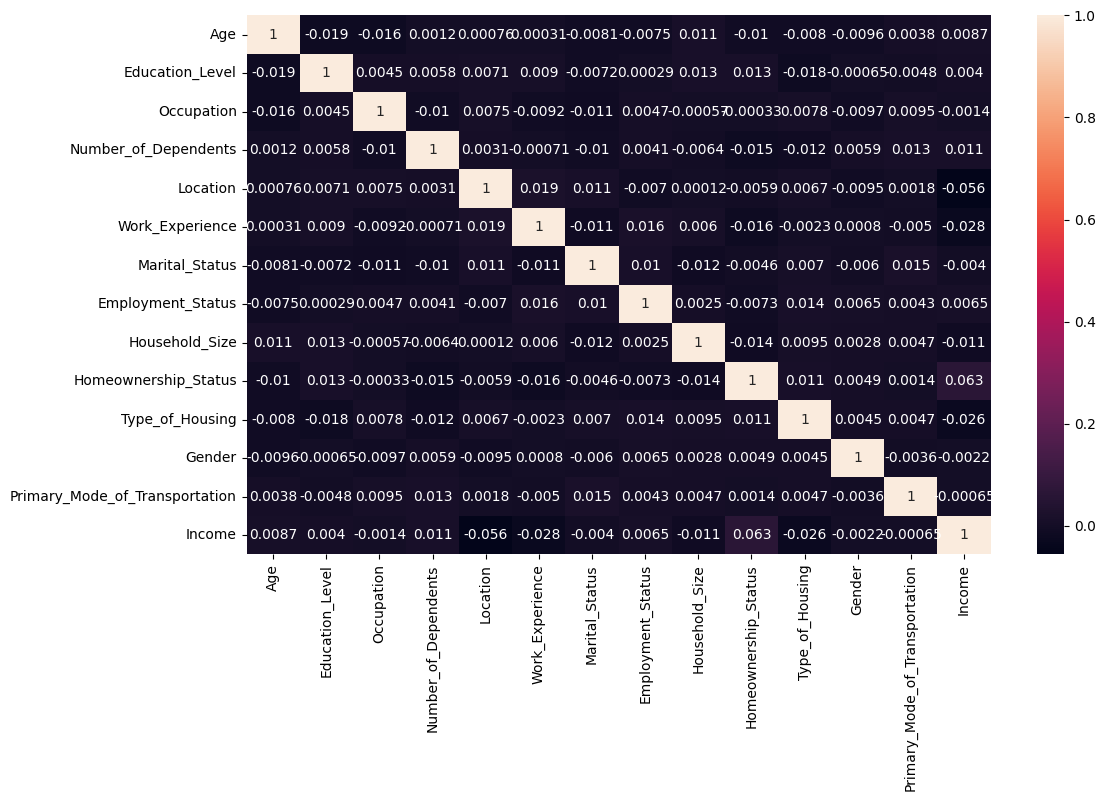

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
df1 = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
plt.figure(figsize=(12, 7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [40]:
data = df.values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
x = data[:, :-1]
y = data[:, -1]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [42]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(pred, y_test)
    r2 = r2_score(pred, y_test)
    print("MSE: ", mse)
    print("r2: ", r2)
    
    return mse, r2

In [48]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [49]:
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
abc = AdaBoostRegressor()
lnr = LinearRegression()
xgb = XGBRegressor()
lgb = LGBMRegressor()

models = [rfc, gbc, abc,
         lnr, xgb, lgb]

names = ["Random Forest", "Gradient Boosting",
        "Ada Boost", "Linear Regression", "XGBoost", "LightGBM"]

In [50]:
mses, r2s = [], []

for i, j in zip(models, names):
    print("*"*30)
    print(j)
    mse, r2 = training(i)
    mses += [mse]
    r2s += [r2]
    print("\n\n")
    
pred = model.predict(x_test)
mse = mean_squared_error(pred, y_test)
r2 = r2_score(pred, y_test)

mses += [mse]
r2s += [r2]

print("*"*30)
print("ANN")
print("MSE: ", mse)
print("r2: ", r2)

******************************
Random Forest
MSE:  0.0324164292199107
r2:  -6.848479269659021



******************************
Gradient Boosting
MSE:  0.03145200240016738
r2:  -30.824329203052493



******************************
Ada Boost
MSE:  0.03951044724318853
r2:  -22.071265942491976



******************************
Linear Regression
MSE:  0.03170623682631595
r2:  -98.67833295397148



******************************
XGBoost
MSE:  0.0359763302356006
r2:  -3.3234928605366996



******************************
LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] Start training from score 0.078777
MSE:  0.03200457666923029
r2:  -13.187100098594469



*************

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

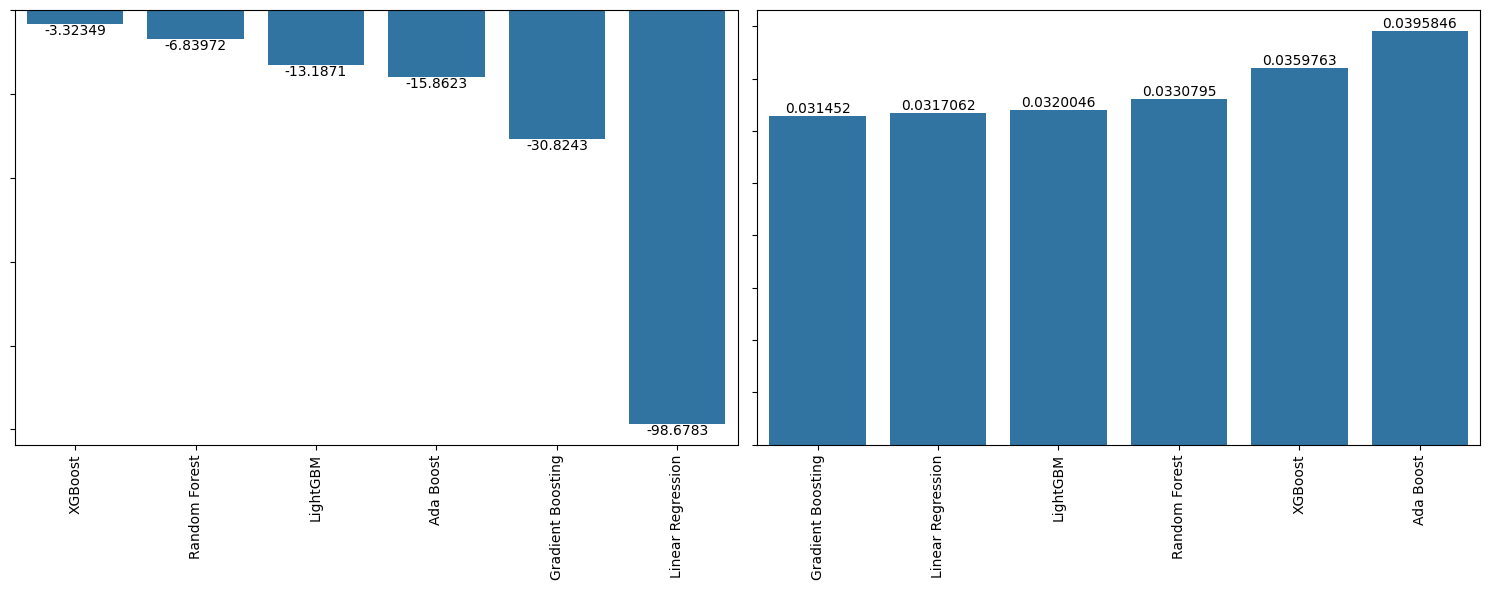

In [46]:
dd = pd.DataFrame({"r2": r2s, "mse": mses}, index=names)
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
index = 0

dd = dd.sort_values("r2", ascending=False)
sns.barplot(x=dd.index, y=dd.iloc[:, index], ax=axes[index])
for container in axes[index].containers:
    axes[index].bar_label(container)
axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")

index += 1

dd = dd.sort_values("mse", ascending=True)
sns.barplot(x=dd.index, y=dd.iloc[:, index], ax=axes[index])
for container in axes[index].containers:
    axes[index].bar_label(container)
axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")

plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 设定随机种子以确保结果可重复
np.random.seed(0)
tf.random.set_seed(0)


# 准备数据
X = df[['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation']]
y = df['Income']

# 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建更深的神经网络模型
model = Sequential([
    Dense(128, input_dim=13, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1)
])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# 设置回调函数
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# 训练模型
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16,
                    callbacks=[early_stopping, reduce_lr], verbose=0)

# 评估模型
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)

# 预测
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# 计算R²
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train:.4f}')
print(f'Test MSE: {mse_test:.4f}')
print(f'Training R²: {r2_train:.4f}')
print(f'Test R²: {r2_test:.4f}')


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
Training MSE: 3245858619392.0000
Test MSE: 3139177021440.0000
Training R²: 0.0295
Test R²: 0.0195


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training MSE: 529.5165
Test MSE: 562.3254
Training R²: 0.4501
Test R²: 0.3421


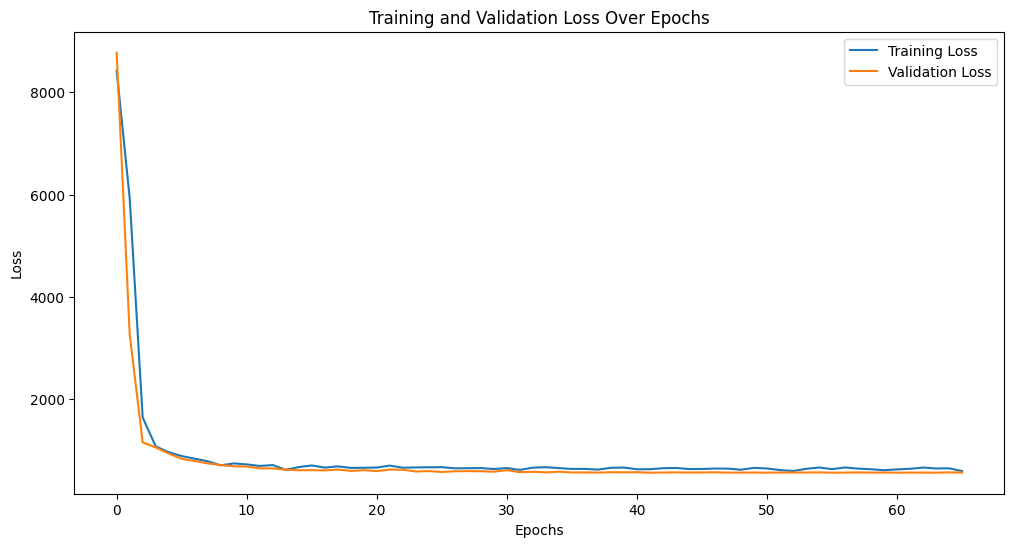

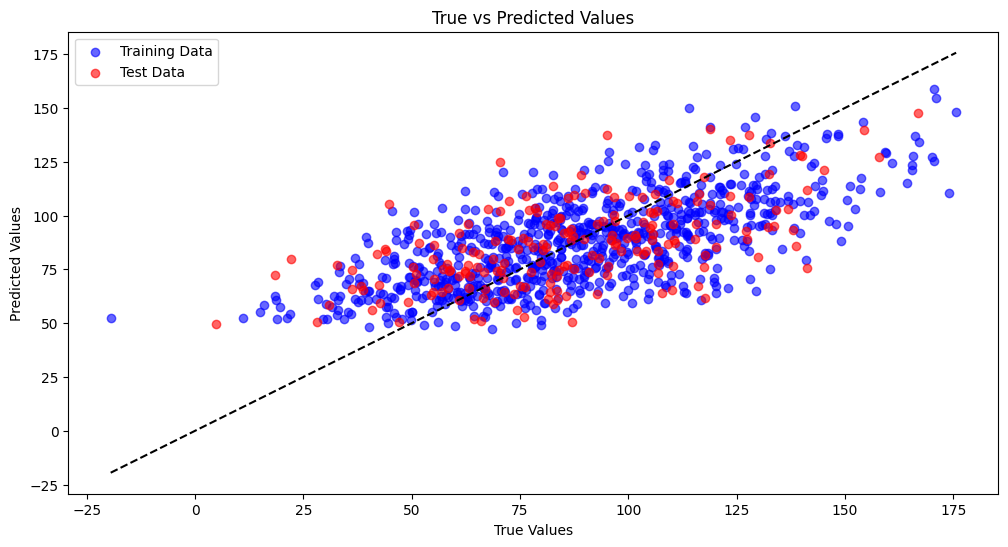

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 设定随机种子以确保结果可重复
np.random.seed(0)
tf.random.set_seed(0)

# 准备数据
X = df[['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation']]
y = df['Income']

# 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建更深的神经网络模型
model = Sequential([
    Dense(128, input_dim=13, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1)
])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# 设置回调函数
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# 训练模型
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16,
                    callbacks=[early_stopping, reduce_lr], verbose=0)

# 评估模型
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)

# 预测
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# 计算R²
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train:.4f}')
print(f'Test MSE: {mse_test:.4f}')
print(f'Training R²: {r2_train:.4f}')
print(f'Test R²: {r2_test:.4f}')

# 可视化训练过程中的损失变化
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化真实值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test Data', color='red', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
